# An analysis of the relationship between GDP and Life Expectancy in six countries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

dataset = pd.read_csv('all_data.csv')
print(dataset.head())
dataset.Country.unique()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

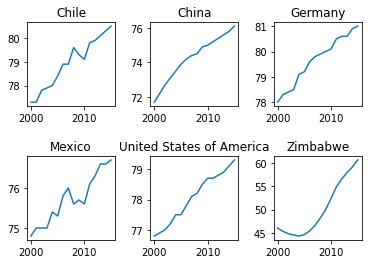

In [38]:
plt.subplot(2, 3, 1)
plt.plot(dataset.Year[dataset.Country == 'Chile'], dataset['Life expectancy at birth (years)'][dataset.Country == 'Chile'])
plt.title('Chile')

plt.subplot(2, 3, 2)
plt.plot(dataset.Year[dataset.Country == 'China'], dataset['Life expectancy at birth (years)'][dataset.Country == 'China'])
plt.title('China')

plt.subplot(2, 3, 3)
plt.plot(dataset.Year[dataset.Country == 'Germany'], dataset['Life expectancy at birth (years)'][dataset.Country == 'Germany'])
plt.title('Germany')

plt.subplot(2, 3, 4)
plt.plot(dataset.Year[dataset.Country == 'Mexico'], dataset['Life expectancy at birth (years)'][dataset.Country == 'Mexico'])
plt.title('Mexico')

plt.subplot(2, 3, 5)
plt.plot(dataset.Year[dataset.Country == 'United States of America'], dataset['Life expectancy at birth (years)'][dataset.Country == 'United States of America'])
plt.title('United States of America')

plt.subplot(2, 3, 6)
plt.plot(dataset.Year[dataset.Country == 'Zimbabwe'], dataset['Life expectancy at birth (years)'][dataset.Country == 'Zimbabwe'])
plt.title('Zimbabwe')
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
plt.show()

Life expectancy in all six countries increased between 2000 and 2015, at different rates. Chile, Mexico and Zimbabwe experienced years where life expectancy was less than the previous year.

In [66]:
min_le = dataset['Life expectancy at birth (years)'].min()
max_le = dataset['Life expectancy at birth (years)'].max()
print('The highest life expectancy of any country was ' + str(max_le) + ' while the lowest was ' + str(min_le))

The highest life expectancy of any country was 81.0 while the lowest was 44.3


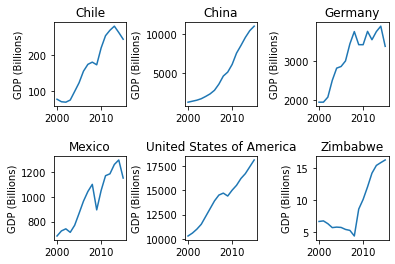

In [65]:
countries = dataset.Country.unique()
i=1
for country in countries:
    ax = plt.subplot(2, 3, i)
    plt.plot(dataset.Year[dataset.Country == country], (dataset['GDP'][dataset.Country == country])/1000000000)
    plt.title(country)
    ax.ticklabel_format(useOffset=False, axis='y', style='plain')
    plt.ylabel('GDP (Billions)')
    i += 1
plt.subplots_adjust(wspace = 0.8, hspace = 0.6)
plt.show()

All six countries have higher GDP in 2015 than 2000. Zimbabwe's decreased for 8 years before tripling. China is the only country to have experienced a steady increase. The US GDP mostly increased, except for a small drop after the 2008 crisis.

Text(0.5, 1.0, 'Life expectancy vs GDP')

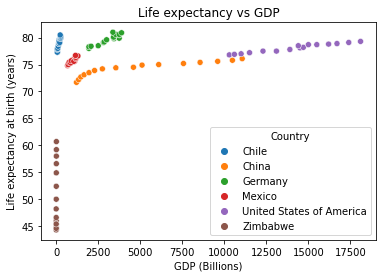

In [71]:
sns.scatterplot(x=dataset['GDP']/1000000000, y=dataset['Life expectancy at birth (years)'], hue=dataset.Country)
plt.xlabel('GDP (Billions)')
plt.title('Life expectancy vs GDP')

The graph shows the general trend of life expectancy increasing and GDP increasing for all six countries. The scale makes it difficult to see detail for each country.

Text(0.5, 1.0, 'Life expectancy vs GDP in Zimbabwe')

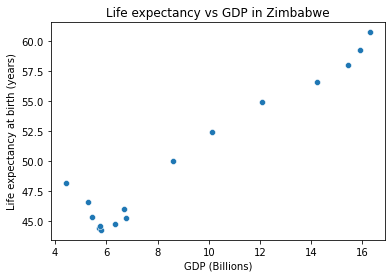

In [74]:
zim = dataset[dataset.Country =='Zimbabwe']
sns.scatterplot(x=zim.GDP/1000000000, y=dataset['Life expectancy at birth (years)'])
plt.xlabel('GDP (Billions)')
plt.title('Life expectancy vs GDP in Zimbabwe')

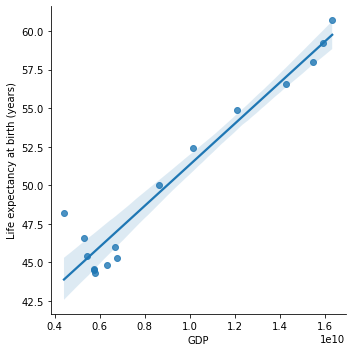

In [75]:
sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=zim)

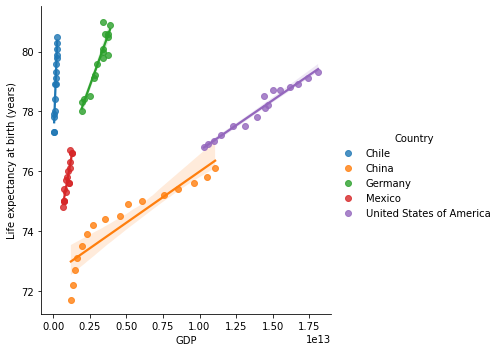

In [83]:
notzim = dataset[dataset.Country != 'Zimbabwe']
sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=notzim, hue='Country')

By removing Zimbabwe, this graph makes it easier to see the trends for the five other countries, whose GDP and life expectancies are closer.

In each case, GDP and life expectancy are correlated.

In [95]:
corr_GDP_life, p = pearsonr(dataset.GDP, dataset['Life expectancy at birth (years)'])
print('Given the disparity in average GDP and life expectancy for the six countries, the correlation coefficient between GDP and life expectancy for all countries is only ' + str(corr_GDP_life))

Given the disparity in average GDP and life expectancy for the six countries, the correlation coefficient between GDP and life expectancy for all countries is only 0.34320674844915594


However when the Pearson correlation is measured individually for each country, the correlation is very strong.

In [93]:
for country in countries:
    country_data = dataset[dataset.Country == country]
    corr_GDP_life, p = pearsonr(country_data.GDP, country_data['Life expectancy at birth (years)'])
    print('For ' + country + ' the correlation coefficient between GDP and life expectancy is ' + str(round(corr_GDP_life, 3)))

For Chile the correlation coefficient between GDP and life expectancy is 0.95
For China the correlation coefficient between GDP and life expectancy is 0.909
For Germany the correlation coefficient between GDP and life expectancy is 0.933
For Mexico the correlation coefficient between GDP and life expectancy is 0.932
For United States of America the correlation coefficient between GDP and life expectancy is 0.982
For Zimbabwe the correlation coefficient between GDP and life expectancy is 0.966
